# Principal component analysis(PCA):



From different dependent variables, we select the variables that explain the most variance of the dataset.<br>
let's use the pca in the logistic regression.<br>


#### Using the logistic regression on Wine.csv to determine the cluster of the customers that the business can recommend to using the information about the ingredients of the wines. 

The number of independent variables is high and to represent the information in the plot, we will need 13 to 14 dimensions, Hence we will exploit dimentionality reduction to get the most out of the independent variables.<br>
i.e. we get the pricipal components.<br>


#### we apply the pca:
`sklearn.decomposition.PCA` <br>
`PCA(n_components=None)` n_components take the number to take out the independent variables `n` principle components when the variables are ranked in order of representation of data(variance of data) with the given variance. here None takes all of the independent variables and then `explained_variance = pca.explained_variance_ratio_` is calculated to see how many of the variables we need to considet inorder to represent most of the data. The `explained_variance` variable is the vector of the sorted order of principal components as it shows the percentage of the variance that particular variable captures from the the data. In this case we see 2 components in order of highest to lowest variance will be enough to represent ~55% of the variance of the data and thus we take `n_components` to be 2.   
<br>
Thus we now use `PCA(n_components=2)`

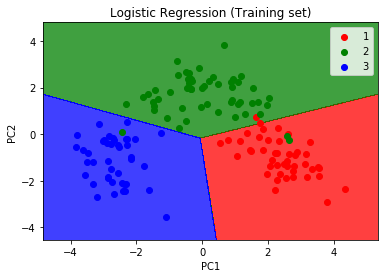

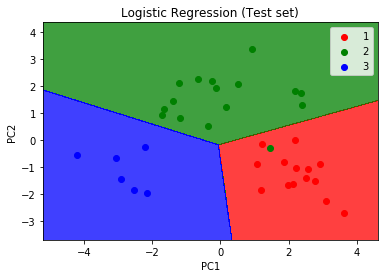

In [1]:
# PCA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




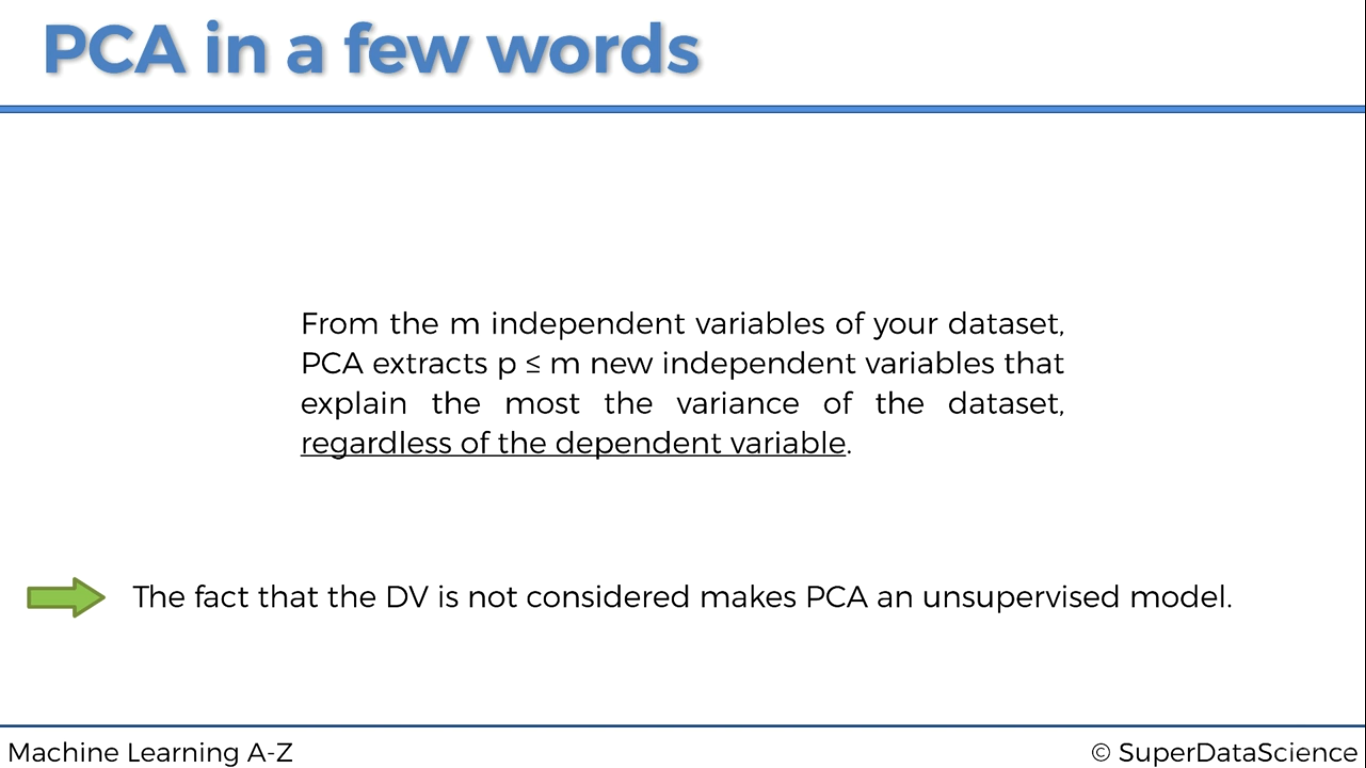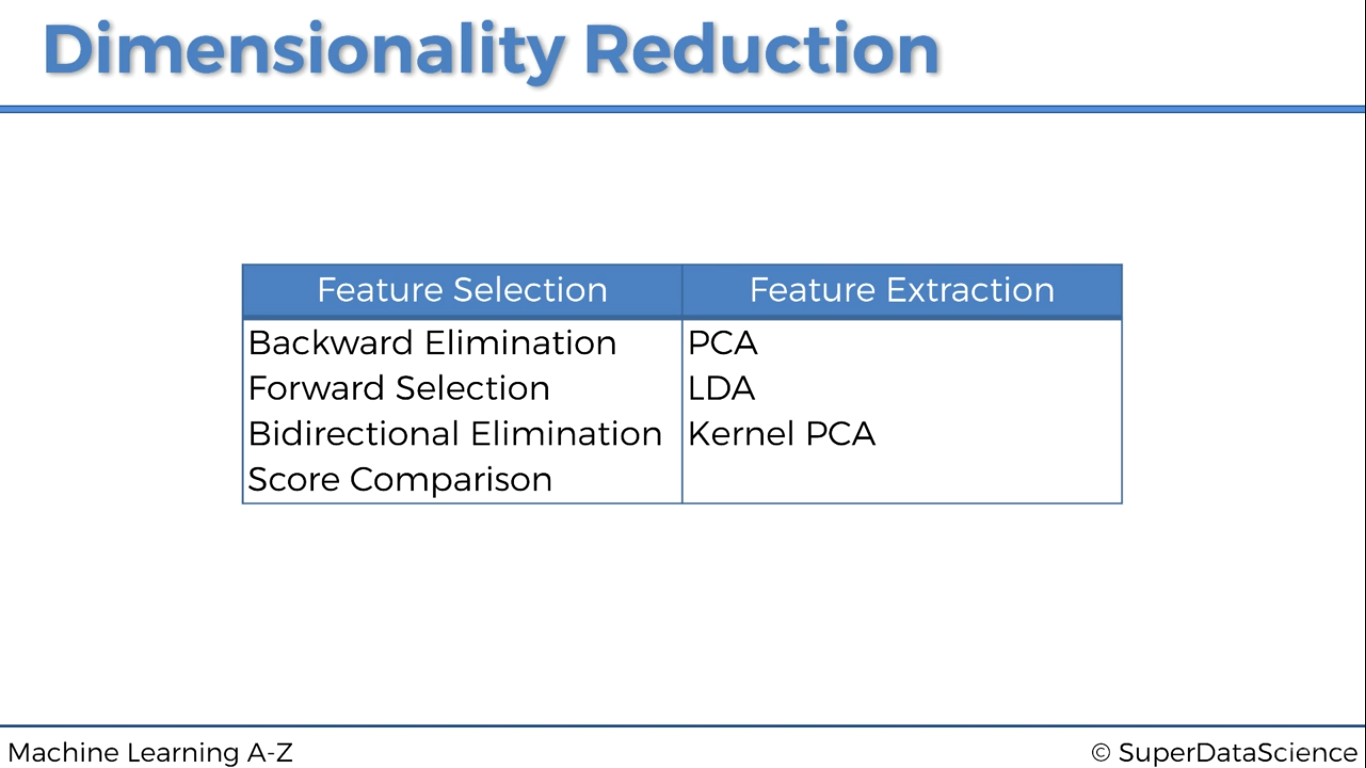